<a href="https://www.kaggle.com/code/mh0386/inception-network?scriptVersionId=239917340" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from os import listdir

from kagglehub import dataset_download
from keras import Model
from keras.src.applications.inception_v3 import InceptionV3
from keras.src.layers import Dense, GlobalAveragePooling2D
from keras.src.utils import load_img, to_categorical
from matplotlib import pyplot
from numpy import argmax, asarray, zeros
from PIL import Image
from seaborn import heatmap
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

2025-05-15 15:32:41.980031: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747323162.177128      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747323162.229820      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
dataset_path = dataset_download("abhinavnayak/catsvdogs-transformed")
print("Path to dataset files:", dataset_path)

Path to dataset files: /kaggle/input/catsvdogs-transformed


In [3]:
data_path: str = f"{dataset_path}/train_transformed/"
print(data_path)

/kaggle/input/catsvdogs-transformed/train_transformed/


In [4]:
list_of_images = listdir(data_path)
number_of_images: int = len(list_of_images)
print(number_of_images)

2000


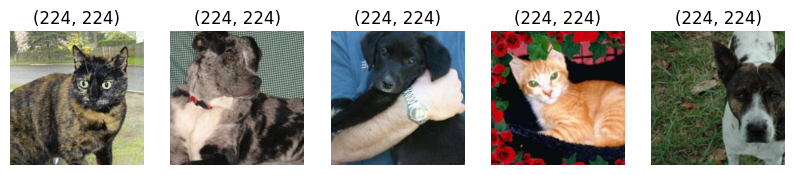

In [5]:
i = 1
pyplot.figure(figsize=(10, 10))
for image in list_of_images:
    if i > 5:
        break
    img = load_img(data_path + image)
    pyplot.subplot(1, 5, i)
    pyplot.imshow(img)
    pyplot.title(str(img.size))
    pyplot.axis("off")
    i += 1

pyplot.show()

In [6]:
images = zeros((number_of_images, 224, 224, 3))
labels = zeros((number_of_images, 1))

In [7]:
for image_number, image_path in enumerate(list_of_images):
    img = Image.open(data_path + image_path)
    img = asarray(img)
    img = img / img.max()
    images[image_number] = img
    labels[image_number] = 0 if "cat" in image_path else 1

In [8]:
print(labels)

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [9]:
labels = to_categorical(labels)

In [10]:
print(labels)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [11]:
images.shape

(2000, 224, 224, 3)

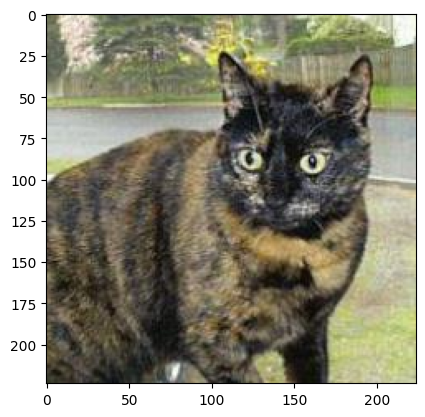

In [12]:
pyplot.imshow(images[0])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 224, 224, 3), (400, 224, 224, 3), (1600, 2), (400, 2))

In [15]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [16]:
model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
)

I0000 00:00:1747323189.740582      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [17]:
# Freeze the pre-trained layers
for layer in model.layers:
    layer.trainable = False

In [18]:
# Add layers using calls:
x = model.output  # Get the output of the InceptionV3 base
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

In [19]:
# Create a new Functional model with these layers:
model = Model(inputs=model.input, outputs=predictions)

In [20]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50


I0000 00:00:1747323210.076838      61 service.cc:148] XLA service 0x79a8e015a890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747323210.077607      61 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747323211.757456      61 cuda_dnn.cc:529] Loaded cuDNN version 90300


 3/50 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5017 - loss: 0.9349  

I0000 00:00:1747323217.323351      61 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.5318 - loss: 0.7720
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6154 - loss: 0.6558
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5915 - loss: 0.6578
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6159 - loss: 0.6406
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6338 - loss: 0.6429
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6330 - loss: 0.6562
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6515 - loss: 0.6255
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6496 - loss: 0.6434
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6608 - loss: 0.6122
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6591 - loss: 0.6087
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6769 - loss: 0.6199
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6957 - 

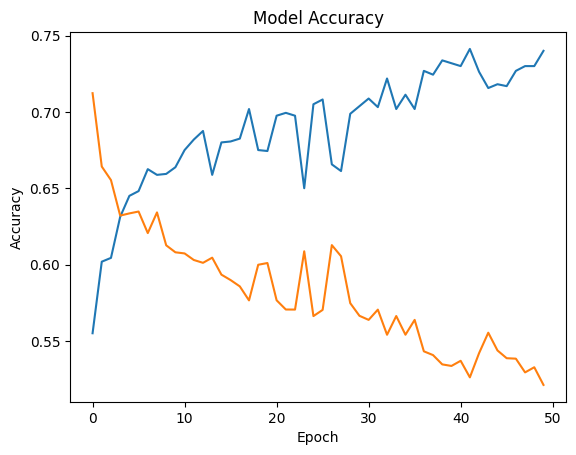

In [22]:
pyplot.plot(history.history["accuracy"])
pyplot.plot(history.history["loss"])
pyplot.title("Model Accuracy")
pyplot.ylabel("Accuracy")
pyplot.xlabel("Epoch")
pyplot.show()

In [23]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 450ms/step - accuracy: 0.7247 - loss: 0.5679


[0.5614091753959656, 0.7350000143051147]

In [24]:
y_predict = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 514ms/step


In [25]:
y_predict = argmax(y_predict, axis=1)
y_test_argmax = argmax(y_test, axis=1)

<Axes: >

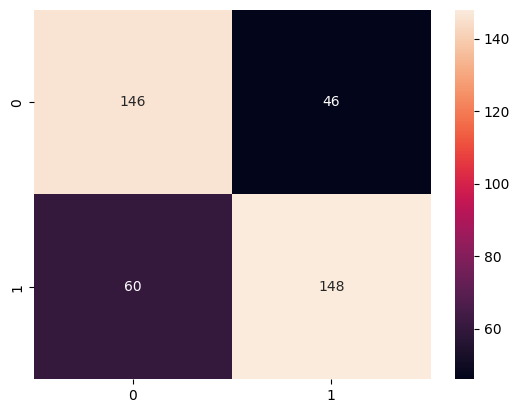

In [26]:
cm = confusion_matrix(y_test_argmax, y_predict)
heatmap(cm, annot=True, fmt="d")

In [27]:
cr = classification_report(y_test_argmax, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       192
           1       0.76      0.71      0.74       208

    accuracy                           0.73       400
   macro avg       0.74      0.74      0.73       400
weighted avg       0.74      0.73      0.74       400

